# Análise Exploratória dos Dados

## Declaração de variáveis
`df_loaded`: variável para armazenar o conjunto de dados original, antes das primeiras intevenções.

`columns_to_drop`: lista de colunas a serem retiradas do conjunto de dados original.

`df`: variável para armazenar o conjunto de dados limpo.

`duplicate_rows`: variável para armazenar registros duplicados.

`new_accommodations_proportion`: proporção de acomodações que possuem `is_new` = 1.

`not_new_num_df`: conjunto de dados filtrado de `df` que contém as colunas numéricas `roomPrice`, `rating`, `countReviews`, sem acomodações novas.

`statistical_summary`: resumo de estatísticas das variáveis numéricas que não são novas.

`variables`: variáveis a serem plotadas.

`colors`: cores para os gráficos.

`bootstrap_distn_roomPrice`: distribuição bootstrap das médias de `roomPrice`.

`bootstrap_distn_rating`: distribuição bootstrap das médias de `rating`.

`bootstrap_distn_countReviews`: distribuição bootstrap das médias de `countReviews`.

`numerical_vars`: lista de variáveis numéricas.

`corr_matrix_spearman`: variável para armazenar a matriz de correlação Spearman.

`spearman_corr`: variável para armazenar a correlação de Spearman.

``

## 1. Descrição do Conjunto de Dados

### 1.1 Considerações Éticas na Coleta de Dados
Embora o Airbnb não forneça uma API pública para acesso direto aos dados de suas acomodações e não endosse explicitamente a coleta de dados via scraping, a técnica utilizada para coletar os dados deste projeto não infringe diretamente leis de propriedade intelectual, visto que os dados são publicamente acessíveis. No entanto, é essencial respeitar as diretrizes de uso do site e considerar as implicações éticas de utilizar dados coletados sem permissão explícita. Portanto, a utilização desses dados está limitada a fins acadêmicos e de pesquisa, ressaltando a importância de discutir e refletir sobre as práticas éticas na análise de dados.

### 1.2 Coleta de dados
Este conjunto de dados foi coletado do site Airbnb Brasil, utilizando o software de web scraping Octoparse. A escolha de Campos do Jordão para a pesquisa foi motivada por ser um destino turístico no período de baixa temporada (entre 17 e 19 de setembro), o que maximiza a quantidade de acomodações disponíveis. Optamos por configurar a busca para acomodações que acomodam um casal e requerem uma estadia mínima de duas noites consecutivas, pois algumas acomodações impõem essa condição.

A coleta de dados ocorreu em duas etapas. Primeiramente, utilizamos algoritmos pré-carregados do próprio Octoparse para extrair informações gerais das acomodações listadas na página de pesquisa, incluindo a URL de cada acomodação (`airbnb_frontPage.json`). Na segunda etapa, acessamos cada URL para extrair informações detalhadas das páginas individuais de cada acomodação (`airbnb_rooms.json`). Os dados coletados nas duas etapas foram integrados no arquivo `merged_df.csv`.

Um tratamento inicial e pré-processamento dos dados foram realizados e estão detalhados no arquivo `preprocessing.ipynb` contido neste repositório (`final_dataset.csv`).

### 1.3 Amostragem
Na página de pesquisa do Airbnb, foi informado que existem mais de mil acomodações disponíveis em Campos do Jordão para o período selecionado. No entanto, o dataset obtido contém 643 registros de acomodações. Essa diferença pode ser devida a várias razões, como limitações do software de scraping, a estrutura dinâmica da página web que pode ocultar alguns dados durante a raspagem, ou restrições impostas pelo site contra scraping intensivo. Portanto, o conjunto de dados obtido deve ser considerado uma amostra e não uma representação completa de todas as acomodações disponíveis. É importante considerar esse fator ao interpretar os resultados da análise, pois pode haver um viés decorrente das acomodações não capturadas.

In [2]:
# Importando as bibliotecas e módulos necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

In [3]:
# Carregando o conjunto de dados no IDE
df_loaded = pd.read_csv('datasets/final_dataset.csv')

## convertendo valores infinitos para NaN
df_loaded = df_loaded.replace([np.inf, -np.inf], np.nan, inplace=False)

## retirando algumas colunas que não foram coletadas corretamente
columns_to_drop = ['Unavailable: Lock on bedroom door', 'Lock on bedroom door', 'Bedroom 2']
df = df_loaded.drop(columns=columns_to_drop)

## renomeando algumas colunas para evitar ambiguidades
df = df.rename(columns={'Dryer': 'Hair Dryer', 'hostType': 'qualityBadge'})


In [4]:
# Visualizando as informações básicas do conjunto de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643 entries, 0 to 642
Data columns (total 43 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   roomType                        643 non-null    object 
 1   roomPrice                       643 non-null    float64
 2   roomURL                         643 non-null    object 
 3   qualityBadge                    643 non-null    object 
 4   rating                          643 non-null    float64
 5   countReviews                    643 non-null    float64
 6   Air Conditioning                643 non-null    int64  
 7   TV                              643 non-null    int64  
 8   Hair Dryer                      643 non-null    int64  
 9   Bathroom                        643 non-null    int64  
 10  Ethernet connection             643 non-null    int64  
 11  Kitchen                         643 non-null    int64  
 12  Elevator                        643 

In [5]:
# Visualizando as primeiras linhas para verificar alterações
print(df.head())

  roomType  roomPrice                                            roomURL  \
0     Loft      268.0  https://www.airbnb.com/rooms/92836566916150808...   
1     Loft       99.0  https://www.airbnb.com/rooms/53832612?adults=2...   
2    Chalé      329.0  https://www.airbnb.com/rooms/22588205?adults=2...   
3    Chalé      595.0  https://www.airbnb.com/rooms/11096252207560438...   
4   Quarto      276.0  https://www.airbnb.com/rooms/22084606?adults=2...   

  qualityBadge  rating  countReviews  Air Conditioning  TV  Hair Dryer  \
0    preferido    4.89          74.0                 0   0           0   
1    preferido    4.95         148.0                 1   1           1   
2    preferido    4.94         319.0                 1   0           0   
3    superhost    5.00           3.0                 0   0           0   
4    preferido    4.93         507.0                 0   1           1   

   Bathroom  ...  Refrigerator  Smoking allowed  Patio  High Chair  Sauna  \
0         0  ...     

## 2. Validação de Dados
O conjunto de dados consiste em dados tabulares com 643 entradas e 46 colunas. Não há valores nulos ou faltantes nos dados. 

Agora, vamos executar as seguintes ações:
- **Verificar a existência de registros duplicados**. Verificaremos se há entradas duplicadas que precisam ser removidas.
- **Engenharia de dados**. Podemos explorar a criação de novas características ou ajustar as existentes para extrair insights mais úteis.
- **Análise de Valores Atípicos**. Verificaremos brevemente se há valores atípicos óbvios que possam distorcer análises futuras.

In [6]:
# Verificação de registros duplicados
duplicate_rows = df.duplicated().sum()
print(f'O conjunto de dados possui {duplicate_rows} registros duplicados.')

O conjunto de dados possui 0 registros duplicados.


Não foram encontrados registros duplicados no conjunto de dados, o que é excelente.

## 3. Descrição das variáveis

### 3.1 Variáveis Quantitativas ou Numéricas
Para uma visualização mais adequada dos dados, vamos considerar somente as acomodações que não são novas (cerca de 5% dos registros são de acomodações novas), porque elas criam outliers e atrapalham a análise das variáveis numéricas.

In [7]:
# Proporção de acomodações novas
new_accommodations_proportion = df['is_new'].mean()

new_accommodations_proportion

0.049766718506998445

In [8]:
# Filtrando para acomodações que não são novas
not_new_num_df = df.query("is_new == 0")[['roomPrice', 'rating', 'countReviews']]

In [9]:
# Resumo de estatísticas das variáveis quantitativas ou numéricas que não são novas
statistical_summary = not_new_num_df.describe()
statistical_summary

,roomPrice,rating,countReviews
count,611.000000,611.000000,611.000000
mean,399.048686,4.900115,82.456628
std,218.441691,0.125321,82.408336
min,83.000000,4.330000,3.000000
25%,236.000000,4.860000,20.000000
50%,363.000000,4.940000,49.000000
75%,517.000000,5.000000,123.000000
max,993.000000,5.000000,507.000000


#### 3.1.1 Visualização das variáveis quantitativas

c:\Users\karlf\anaconda3\envs\scrapy-venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\karlf\anaconda3\envs\scrapy-venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\karlf\anaconda3\envs\scrapy-venv\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\karlf\anaconda3\envs\scrapy-venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use

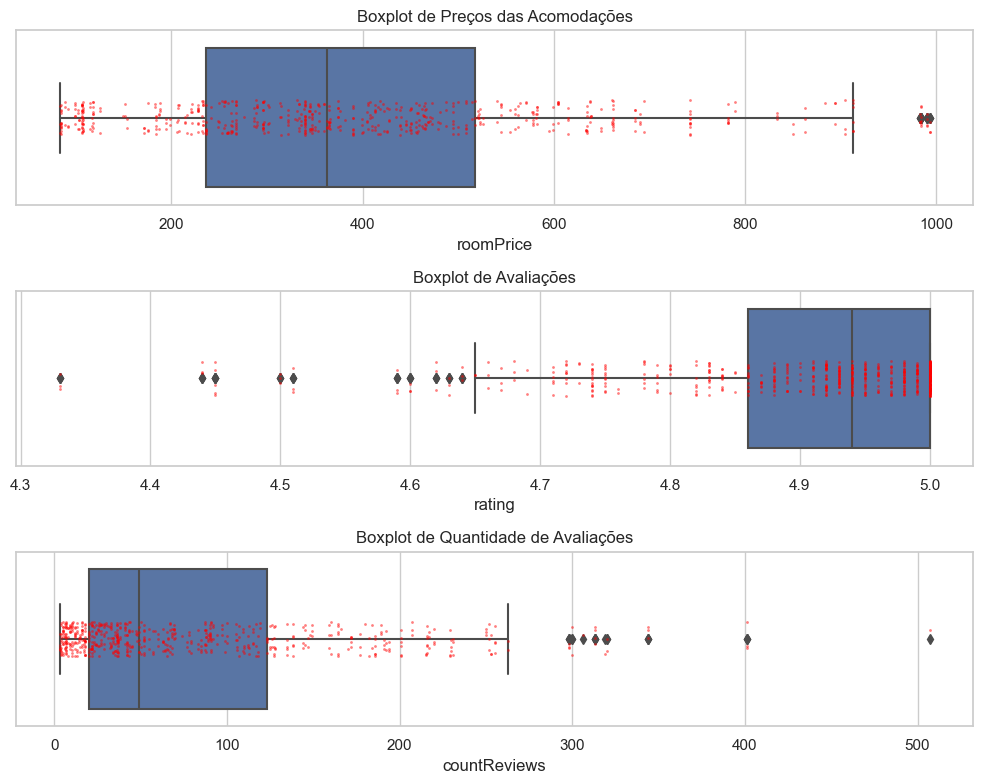

In [10]:
# Criando boxplots para as variáveis numéricas que não são novas
## configurações de estilo do seaborn
sns.set(style="whitegrid")

## criando uma figura e um conjunto de subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 8))

## boxplot e stripplot para 'roomPrice'
sns.boxplot(ax=axes[0], x=not_new_num_df['roomPrice'])
sns.stripplot(ax=axes[0], x=not_new_num_df['roomPrice'], color='red', jitter=True, size=2, alpha=0.5)
axes[0].set_title('Boxplot de Preços das Acomodações')

## boxplot e stripplot para 'rating'
sns.boxplot(ax=axes[1], x=not_new_num_df['rating'])
sns.stripplot(ax=axes[1], x=not_new_num_df['rating'], color='red', jitter=True, size=2, alpha=0.5)
axes[1].set_title('Boxplot de Avaliações')

## boxplot e stripplot para 'countReviews'
sns.boxplot(ax=axes[2], x=not_new_num_df['countReviews'])
sns.stripplot(ax=axes[2], x=not_new_num_df['countReviews'], color='red', jitter=True, size=2, alpha=0.5)
axes[2].set_title('Boxplot de Quantidade de Avaliações')

## mostrar os gráficos
plt.tight_layout()
plt.show()

**Preços das Acomodações (roomPrice)**: Há uma ampla variação nos preços, com alguns outliers visíveis tanto no extremo inferior quanto no superior. Isso pode indicar a presença de tipos muito diferentes de acomodações no conjunto de dados, desde opções mais econômicas até acomodações de luxo.

**Avaliações (rating)**: A maioria das avaliações concentra-se no extremo superior da escala, sugerindo que a maioria das acomodações tem uma avaliação alta. No entanto, existem algumas avaliações mais baixas, o que poderia ser interessante explorar para entender os motivos de tais avaliações.

**Quantidade de Avaliações (countReviews)**: Similarmente aos preços, há uma grande variação no número de avaliações recebidas pelas acomodações. Alguns estabelecimentos receberam muitas avaliações, enquanto outros têm muito poucas, o que pode estar relacionado com o tempo de listagem no Airbnb ou com sua popularidade.

#### 3.1.2 Testes de Normalidade

c:\Users\karlf\anaconda3\envs\scrapy-venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\karlf\anaconda3\envs\scrapy-venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\karlf\anaconda3\envs\scrapy-venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


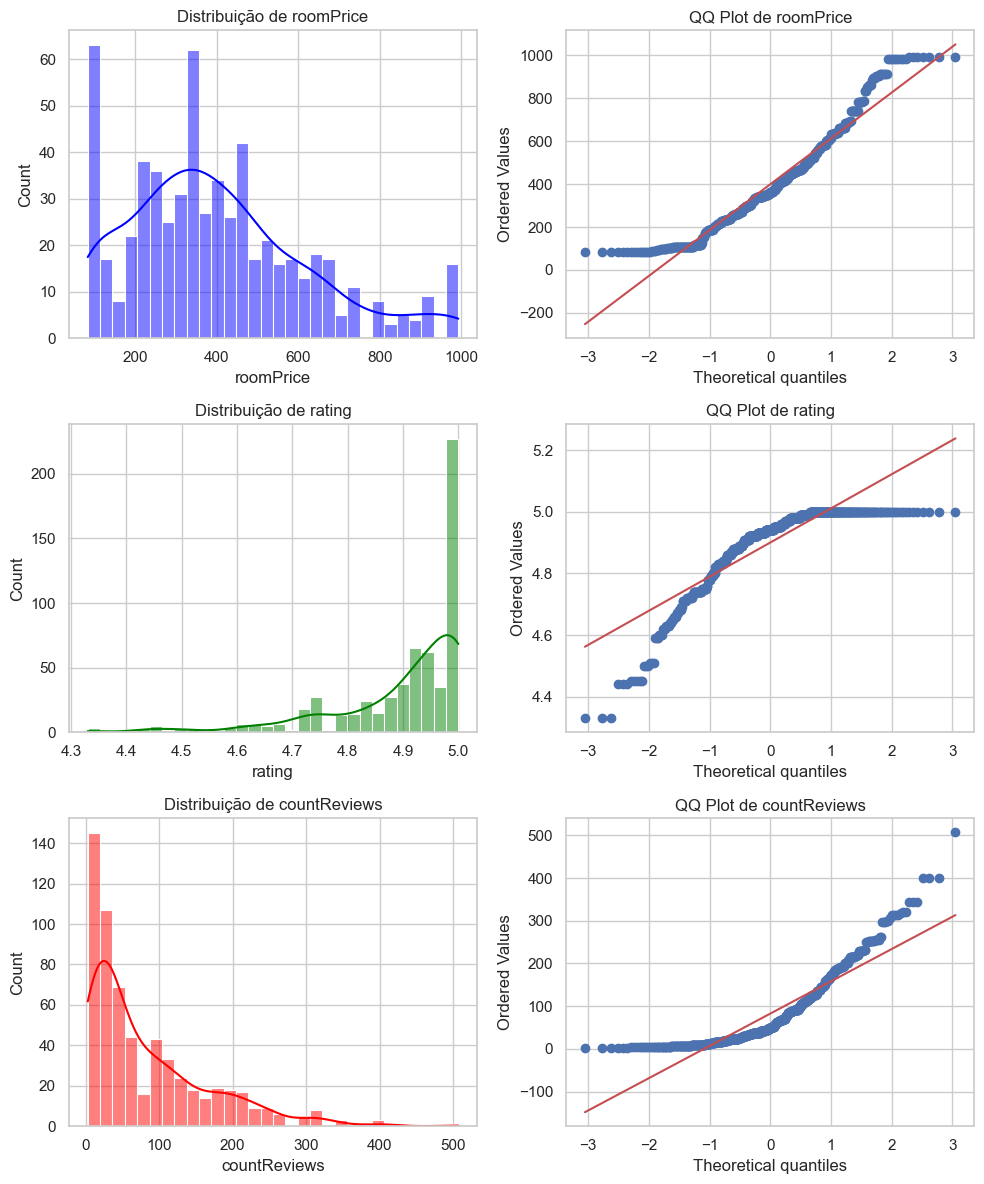

In [11]:
# Testes visuais de normalidade: Histograma e QQ-Plot

## configurações de estilo do seaborn
sns.set(style="whitegrid")

## criar uma figura com múltiplos subplots
fig, axes = plt.subplots(3, 2, figsize=(10, 12))

## variáveis a plotar
variables = ['roomPrice', 'rating', 'countReviews']

## cores para os gráficos
colors = ['blue', 'green', 'red']

## loop para criar os gráficos para cada variável
for i, var in enumerate(variables):
    ### Histograma com KDE
    sns.histplot(data=not_new_num_df, x=var, kde=True, ax=axes[i, 0], color=colors[i], bins=30)
    axes[i, 0].set_title(f'Distribuição de {var}')

    ### QQ plot
    stats.probplot(not_new_num_df[var].dropna(), dist="norm", plot=axes[i, 1])
    axes[i, 1].set_title(f'QQ Plot de {var}')

## ajustar o layout e mostrar os gráficos
plt.tight_layout()
plt.show()

In [12]:
# Teste de Normalidade de Kolmogorov-Smirnov
"""
o teste de Shapiro-Wilk pode não ser adequado para amostras muito grandes devido à sua alta sensibilidade para detectar 
mesmo pequenas desvios da normalidade. Para grandes conjuntos de dados, como parece ser o seu caso, o teste de 
Kolmogorov-Smirnov (KS) é uma alternativa robusta que pode ser usada para testar a aderência a uma distribuição normal.

O teste de Kolmogorov-Smirnov compara a distribuição cumulativa empírica dos dados com a distribuição cumulativa esperada 
de uma distribuição teórica (neste caso, a distribuição normal). A hipótese nula é de que os dados seguem a distribuição 
especificada.
"""

# Teste KS para roomPrice
ks_statistic, ks_pvalue = stats.kstest(not_new_num_df['roomPrice'], 'norm', args=(not_new_num_df['roomPrice'].mean(), not_new_num_df['roomPrice'].std()))
print(f'roomPrice - KS statistic: {ks_statistic:.4f}, p-value: {ks_pvalue:.4f}')

# Teste KS para rating
ks_statistic, ks_pvalue = stats.kstest(not_new_num_df['rating'], 'norm', args=(not_new_num_df['rating'].mean(), not_new_num_df['rating'].std()))
print(f'rating - KS statistic: {ks_statistic:.4f}, p-value: {ks_pvalue:.4f}')

# Teste KS para countReviews
ks_statistic, ks_pvalue = stats.kstest(not_new_num_df['countReviews'], 'norm', args=(not_new_num_df['countReviews'].mean(), not_new_num_df['countReviews'].std()))
print(f'countReviews - KS statistic: {ks_statistic:.4f}, p-value: {ks_pvalue:.4f}')

roomPrice - KS statistic: 0.0822, p-value: 0.0005
rating - KS statistic: 0.2127, p-value: 0.0000
countReviews - KS statistic: 0.1695, p-value: 0.0000


1. **roomPrice**
- Histograma com KDE: Mostra que a distribuição de roomPrice é levemente assimétrica à direita, indicando uma cauda mais longa para os preços mais altos.
- QQ Plot: Os pontos se desviam da linha teórica nos extremos, especialmente para valores mais altos, sugerindo que a distribuição tem caudas mais pesadas do que uma distribuição normal.  

- KS statistic: 0.0822
- p-value: 0.0005   

**Interpretação**: O p-valor muito baixo (< 0.05) indica que rejeitamos a hipótese nula de que os dados seguem uma distribuição normal. Isso é consistente com a assimetria observada no histograma e no QQ plot.  
   
   
   
2. **rating**
- Histograma com KDE: A distribuição é claramente assimétrica à esquerda, com uma concentração de valores altos e muito poucos valores baixos.
- QQ Plot: Os pontos seguem a linha nos valores centrais mas desviam nos extremos, especialmente para valores mais altos, indicando que a distribuição não é normal e tem cauda esquerda mais curta.  

- KS statistic: 0.2127
- p-value: 0.0000   

**Interpretação**: Novamente, o p-valor é extremamente baixo, indicando que os dados não seguem uma distribuição normal. Isso também corresponde à distribuição fortemente assimétrica observada nos gráficos.  
    
    
    
3. **countReviews**
- Histograma com KDE: Mostra uma distribuição fortemente assimétrica à direita, com uma concentração de valores baixos e alguns valores extremamente altos.
- QQ Plot: Os pontos desviam significativamente da linha nos valores mais altos, mostrando uma cauda longa à direita que não é característica de uma distribuição normal.  

- KS statistic: 0.1695
- p-value: 0.0000   

**Interpretação**: O p-valor muito baixo sugere que rejeitamos a hipótese nula de normalidade para countReviews. A distribuição fortemente assimétrica à direita também foi evidente nos gráficos.

Dada a natureza das distribuições e os desvios observados nos QQ Plots, é evidente que nenhuma das variáveis segue uma distribuição normal perfeita. Isso é comum em dados reais, especialmente em dados de preços e contagens.

#### 3.1.3 Transformação de dados das variáveis Numéricas
Tentamos as transformações logarítmicas e de Box-Cox, mas não conseguimos a normalização dos dados ou resultados diferentes do que se usássemos métodos que não assumem a normalidade dos dados.

Então nós decidimos criar uma distribuição por bootstrap das variáveis, se aproveitando do Teorema do Limite Central, pois a distribuição das medianas amostrais tende a se aproximar de uma distribuição normal. Estamos usando a mediana como medida de tendência central porque ela émais robusta a valores extremos, e nossos dados possuem muitos outliers.

c:\Users\karlf\anaconda3\envs\scrapy-venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\karlf\anaconda3\envs\scrapy-venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\karlf\anaconda3\envs\scrapy-venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


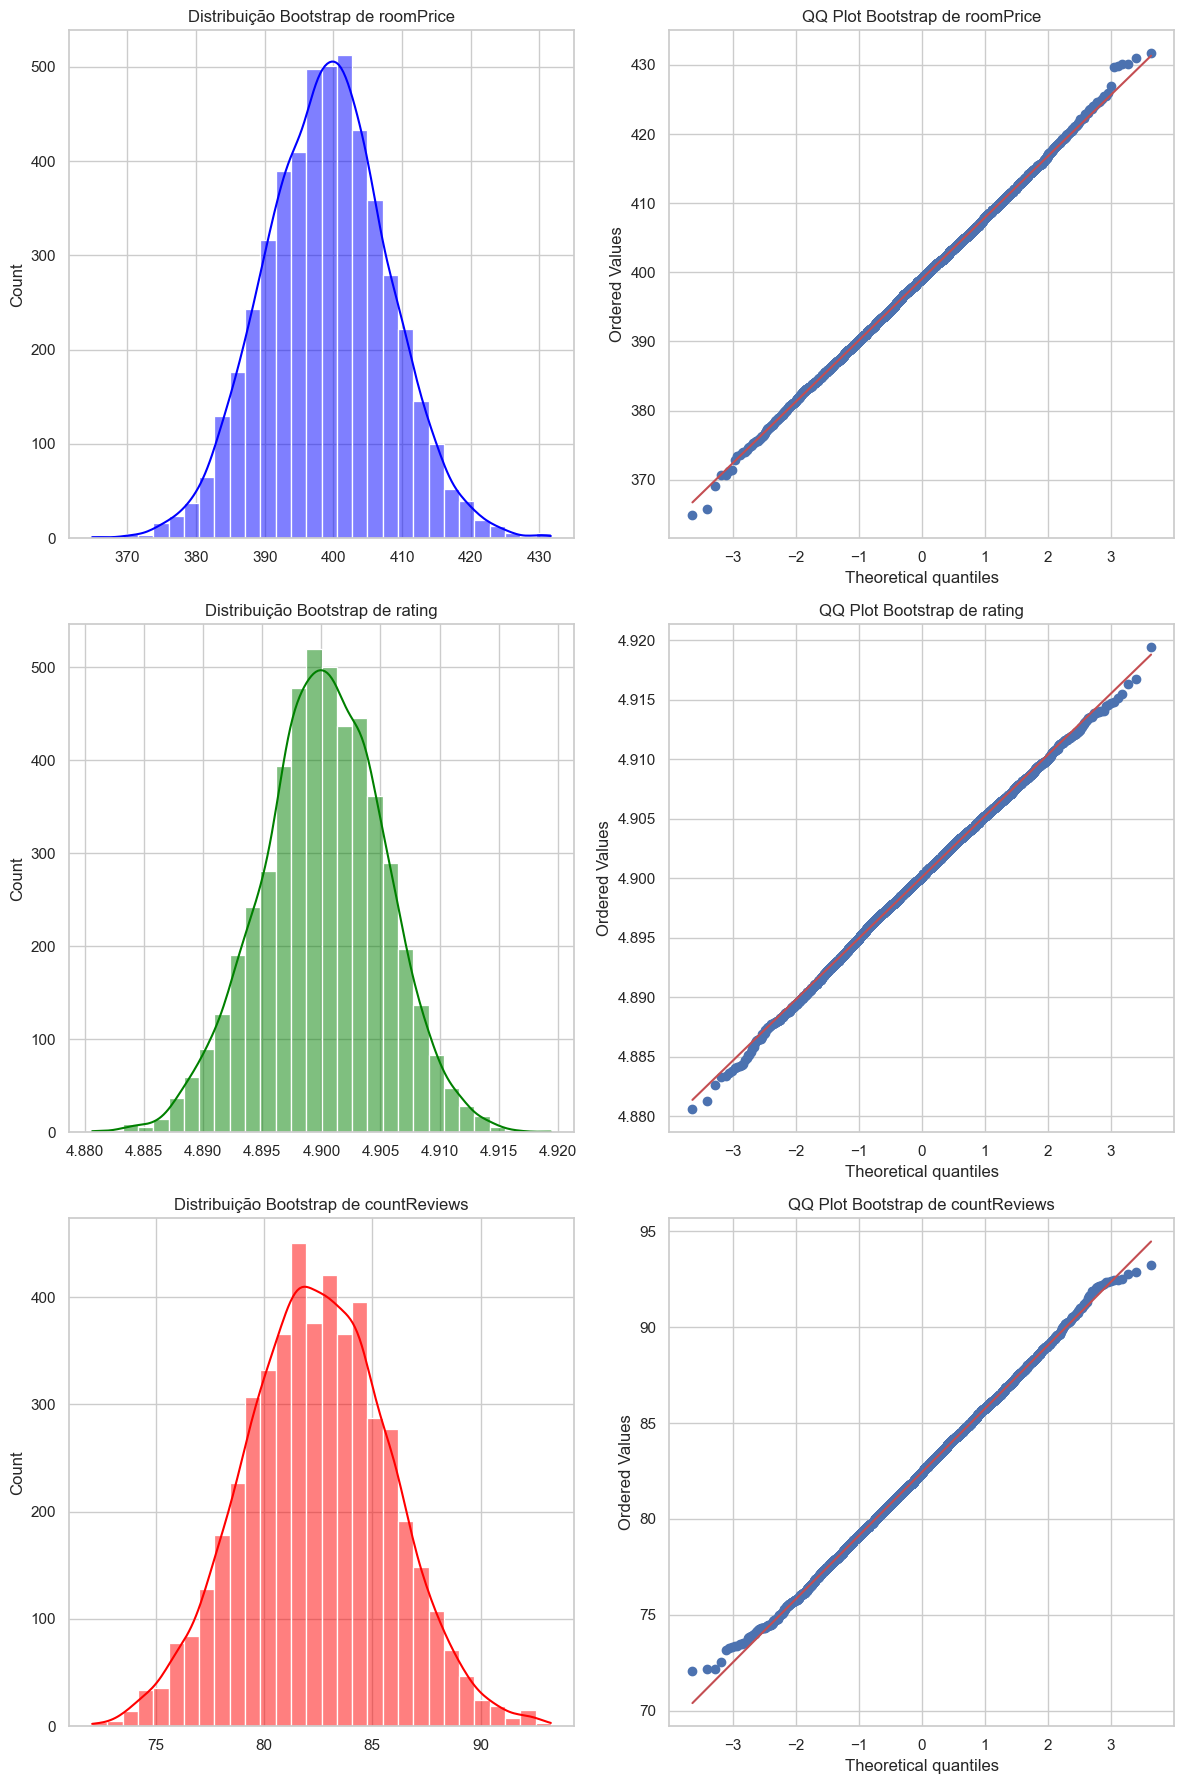

In [13]:
# Construindo Distribuições Bootstrap

## função para realizar o bootstrap e calcular as medianas
def bootstrap_distn(data, n_bootstrap=5000):
    bootstrap_distn = np.empty(n_bootstrap)
    for i in range(n_bootstrap):
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        bootstrap_distn[i] = np.mean(bootstrap_sample)
    return bootstrap_distn

## gerar distribuições bootstrap das medianas para cada variável
bootstrap_distn_roomPrice = bootstrap_distn(not_new_num_df['roomPrice'])
bootstrap_distn_rating = bootstrap_distn(not_new_num_df['rating'])
bootstrap_distn_countReviews = bootstrap_distn(not_new_num_df['countReviews'])

## visualizar as distribuições bootstrap das medianas
fig, axes = plt.subplots(3, 2, figsize=(12, 18))

## histograma com KDE para bootstrap_medians_roomPrice
sns.histplot(bootstrap_distn_roomPrice, kde=True, ax=axes[0, 0], color='blue', bins=30)
axes[0, 0].set_title('Distribuição Bootstrap de roomPrice')
stats.probplot(bootstrap_distn_roomPrice, dist="norm", plot=axes[0, 1])
axes[0, 1].set_title('QQ Plot Bootstrap de roomPrice')

## histograma com KDE para bootstrap_medians_rating
sns.histplot(bootstrap_distn_rating, kde=True, ax=axes[1, 0], color='green', bins=30)
axes[1, 0].set_title('Distribuição Bootstrap de rating')
stats.probplot(bootstrap_distn_rating, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('QQ Plot Bootstrap de rating')

## histograma com KDE para bootstrap_medians_countReviews
sns.histplot(bootstrap_distn_countReviews, kde=True, ax=axes[2, 0], color='red', bins=30)
axes[2, 0].set_title('Distribuição Bootstrap de countReviews')
stats.probplot(bootstrap_distn_countReviews, dist="norm", plot=axes[2, 1])
axes[2, 1].set_title('QQ Plot Bootstrap de countReviews')

## ajustando o layout e mostrar os gráficos
plt.tight_layout()
plt.show()

In [22]:
# Calculando intervalos de confiança para as médias bootstrap
## função para calcular intervalos de confiança
def calc_confidence_intervals(bootstrap_samples, confidence_level=0.95):
    lower_bound = np.percentile(bootstrap_samples, (1 - confidence_level) / 2 * 100)
    upper_bound = np.percentile(bootstrap_samples, (1 + confidence_level) / 2 * 100)
    return lower_bound, upper_bound

## calcular intervalos de confiança para as médias bootstrap
ci_roomPrice = calc_confidence_intervals(bootstrap_distn_roomPrice)
ci_rating = calc_confidence_intervals(bootstrap_distn_rating)
ci_countReviews = calc_confidence_intervals(bootstrap_distn_countReviews)

print(f'Intervalo de Confiança para a Média de roomPrice: {ci_roomPrice}')
print(f'Intervalo de Confiança para a Média de rating: {ci_rating}')
print(f'Intervalo de Confiança para a Média de countReviews: {ci_countReviews}')


Intervalo de Confiança para a Média de roomPrice: (381.82156252143835, 416.37381942334645)
Intervalo de Confiança para a Média de rating: (4.889574468085106, 4.909804418985271)
Intervalo de Confiança para a Média de countReviews: (75.85081833060556, 88.95425531914893)


#### 3.1.4 Correlação entre Variáveis Quantitativas

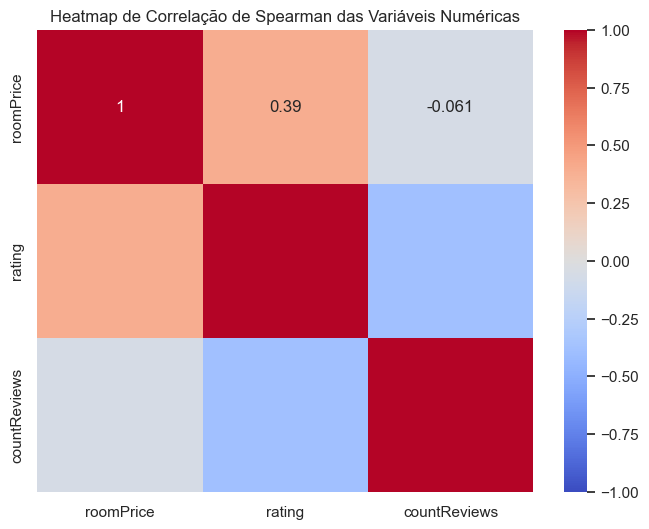

In [14]:
# Heatmap de Correlação de Spearman das Variáveis Numéricas
## selecionar apenas as variáveis numéricas
numerical_vars = ['roomPrice', 'rating', 'countReviews']

## calcular a matriz de correlação de Spearman
corr_matrix_spearman = not_new_num_df[numerical_vars].corr(method='spearman')

## plotar o heatmap de correlação de Spearman
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_spearman, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap de Correlação de Spearman das Variáveis Numéricas')
plt.show()


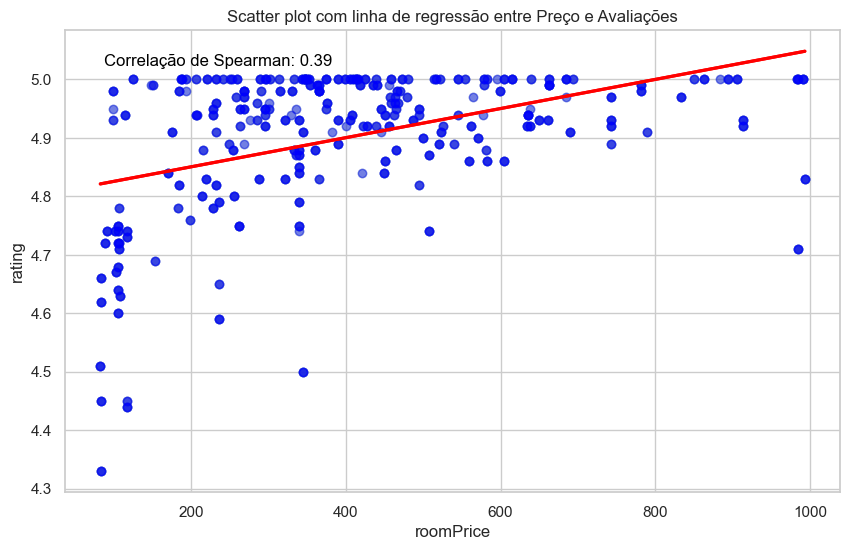

In [15]:
# Scatter plot com linha de regressão entre Preço e Avaliações
## configurando de estilo do seaborn
sns.set(style='whitegrid')

## criando a figura
plt.figure(figsize=(10, 6))

## regplot 
sns.regplot(data=not_new_num_df, x='roomPrice', y='rating', scatter_kws={'alpha':0.5}, line_kws={'color': 'red'}, ci=None)
plt.title('Scatter plot com linha de regressão entre Preço e Avaliações')

## adicionando labels
plt.xlabel('Preço')
plt.ylabel('Avaliação')

## ajustar a linha de regressão para usar Spearman
spearman_corr = not_new_num_df[['roomPrice', 'rating']].corr(method='spearman').iloc[0, 1]
sns.regplot(data=not_new_num_df, x='roomPrice', y='rating', scatter_kws={'color':'blue', 'alpha':0.3}, line_kws={'color': 'red'}, ci=None)
plt.annotate(f'Correlação de Spearman: {spearman_corr:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, color='black', ha='left', va='top')

## mostrar o gráfico
plt.show()

O gráfico mostra uma correlação moderada positiva (0,39) entre avaliações e preços, e uma correlação nula entre outras variáveis, o que significa que provavelmente a quantidade de avaliações não interfere nos preços e avaliações.

#### 3.1.5 Identificando e Lidando com Outliers nas Variáveis Quantitativas
Lidar com outliers é crucial para obter análises mais precisas e modelos preditivos robustos. Pelos gráficos boxplots identificamos, pelo método do Intervalo Interquartil (IQR), que as três variáveis categóricas possuem outliers. Podemos usar outros métodos também.

In [16]:
# Identificação de Outliers pelo método do Desvio Padrão


### Variáveis Qualitativas ou Categóricas

#### Tabela de Frequência

In [18]:
# Resumo de estatísticas das variáveis qualitativas ou categóricas
cat_df = df[['roomType', 'qualityBadge', 'is_new']].astype('category')
cat_summary = cat_df.describe()
cat_summary

,roomType,qualityBadge,is_new
count,643,643,643
unique,14,3,2
top,Casa,preferido,0
freq,114,451,611


#### Gráfico de barras

## Engenharia de Dados
Usando as informações disponíveis, podemos criar as seguintes variáveis:

In [20]:
# Segmentação de Preços
"""
Classificar acomodações em faixas de preço (baixo, médio, alto) pode 
facilitar a análise de padrões por faixa de preço.
"""


'\nClassificar acomodações em faixas de preço (baixo, médio, alto) pode \nfacilitar a análise de padrões por faixa de preço.\n'

In [21]:
# Acomodações de Luxo
"""
As acomodações que possuam preço alto e também sejam do tipo superhost.
"""


'\nAs acomodações que possuam preço alto e também sejam do tipo superhost.\n'